* __Part 4a:__ Stemming and Lemmatizing
* __Part 4b:__  Modeling; Logistic Regression and Random Forest

In [3]:
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer

import spacy

import nltk
from nltk.stem.porter import *
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

In [4]:
reddit= pd.read_csv('./data/cleaned_reddit.csv')
reddit.head()

,Unnamed: 0,index,author,created_utc,full_link,id,num_comments,retrieved_on,selftext,subreddit,title,url,posts,word_count
0,1,1,banksnosons,1629570605,https://www.reddit.com/r/legaladvice/comments/...,p8wn7t,3,1629577686,What can I do? My old neighbor witnessed the p...,1,"Package delivered to old residence, not being ...",https://www.reddit.com/r/legaladvice/comments/...,"package delivered to old residence, not being ...",70
1,2,2,Hangman_Matt,1629570478,https://www.reddit.com/r/legaladvice/comments/...,p8wlv0,12,1629577576,Does use of obscene language in school fall un...,1,First Ammendment rights and Schools,https://www.reddit.com/r/legaladvice/comments/...,first ammendment rights and schools.does use o...,216
2,3,3,Throwawaaaaaay526289,1629570313,https://www.reddit.com/r/legaladvice/comments/...,p8wk5r,4,1629577433,Basically what the title says. I've never been...,1,Virginia - If my employer only shows a set amo...,https://www.reddit.com/r/legaladvice/comments/...,virginia if my employer only shows a set amo...,206
3,4,4,unholychalice,1629570134,https://www.reddit.com/r/legaladvice/comments/...,p8wi9h,3,1629577281,Can I record with video and audio from my porc...,1,Can I record visual and audio from my front po...,https://www.reddit.com/r/legaladvice/comments/...,can i record visual and audio from my front po...,100
4,6,6,opsboop,1629569971,https://www.reddit.com/r/legaladvice/comments/...,p8wgjm,0,1629577141,"We live on a quiet, low traffic street with ma...",1,[Va] 7 year old walking up and down the street...,https://www.reddit.com/r/legaladvice/comments/...,[va] 7 year old walking up and down the street...,78


In [5]:
reddit.drop('Unnamed: 0',axis = 1, inplace = True)

In [6]:
reddit.shape

(4642, 13)

In [7]:
reddit.isnull().sum()

index           0
author          0
created_utc     0
full_link       0
id              0
num_comments    0
retrieved_on    0
selftext        1
subreddit       0
title           0
url             0
posts           0
word_count      0
dtype: int64

In [8]:
reddit.posts[2]

"virginia   if my employer only shows a set amount of hours worked every paycheck for every employee, is that legal?.basically what the title says. i've never been given a real answer on why it's done this way. everyone's paycheck shows 86 hours on the paystub of our checks every payday regardless of what they actually worked. nobody knows the exact amount of time they've worked unless they've taken a picture of their time card and added it up themselves. i've had repeated paychecks with the exact same amount down to the change being exactly same and it's to a point where i've calculated my own hours and talked to my manager to compare every payday. however, even then i'm still unsure if it's accurate. do employers round by the hour? i can't see how this is legal and i wanna put in a complaint to someone higher than the company at this point. i've been underpaid too often, and it has been corrected each time, but this is ridiculous. i shouldn't have to play payroll every time i'm given

## Preprocessing of Text Data

### Lemmatization with NLTK

Let's include a new column in the dataframe that includes all lematized words from the corpus. 

In [9]:
# instantiate
lemmatizer = WordNetLemmatizer()

reddit['lemm_posts']= reddit['posts'].apply(lambda x: ' '.join([lemmatizer.lemmatize (w) for w in word_tokenize(x)]))

In [10]:
reddit

,index,author,created_utc,full_link,id,num_comments,retrieved_on,selftext,subreddit,title,url,posts,word_count,lemm_posts
0,1,banksnosons,1629570605,https://www.reddit.com/r/legaladvice/comments/...,p8wn7t,3,1629577686,What can I do? My old neighbor witnessed the p...,1,"Package delivered to old residence, not being ...",https://www.reddit.com/r/legaladvice/comments/...,"package delivered to old residence, not being ...",70,"package delivered to old residence , not being..."
1,2,Hangman_Matt,1629570478,https://www.reddit.com/r/legaladvice/comments/...,p8wlv0,12,1629577576,Does use of obscene language in school fall un...,1,First Ammendment rights and Schools,https://www.reddit.com/r/legaladvice/comments/...,first ammendment rights and schools.does use o...,216,first ammendment right and schools.does use of...
2,3,Throwawaaaaaay526289,1629570313,https://www.reddit.com/r/legaladvice/comments/...,p8wk5r,4,1629577433,Basically what the title says. I've never been...,1,Virginia - If my employer only shows a set amo...,https://www.reddit.com/r/legaladvice/comments/...,virginia if my employer only shows a set amo...,206,virginia if my employer only show a set amount...
3,4,unholychalice,1629570134,https://www.reddit.com/r/legaladvice/comments/...,p8wi9h,3,1629577281,Can I record with video and audio from my porc...,1,Can I record visual and audio from my front po...,https://www.reddit.com/r/legaladvice/comments/...,can i record visual and audio from my front po...,100,can i record visual and audio from my front po...
4,6,opsboop,1629569971,https://www.reddit.com/r/legaladvice/comments/...,p8wgjm,0,1629577141,"We live on a quiet, low traffic street with ma...",1,[Va] 7 year old walking up and down the street...,https://www.reddit.com/r/legaladvice/comments/...,[va] 7 year old walking up and down the street...,78,[ va ] 7 year old walking up and down the stre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,2991,the_queen_of_nada,1628067537,https://www.reddit.com/r/CasualConversation/co...,oxolvq,3,1628067547,"Long story short, I grew up poor and as the yo...",0,Today I learned I don't know how to dress myself,https://www.reddit.com/r/CasualConversation/co...,today i learned i don't know how to dress myse...,553,today i learned i do n't know how to dress mys...
4638,2994,tacful_cactus,1628065950,https://www.reddit.com/r/CasualConversation/co...,oxo9s6,13,1628065961,My mum is the sort of person who has a lot of ...,0,My mum has figured out emojis and it sounds si...,https://www.reddit.com/r/CasualConversation/co...,my mum has figured out s and it sounds silly ...,120,my mum ha figured out s and it sound silly but...
4639,2995,slasher011,1628063510,https://www.reddit.com/r/CasualConversation/co...,oxnqlq,3,1628063521,I am in an hotel wasting 11 days of my life.\n...,0,Anyone wanna talk to Someone that’s got nothin...,https://www.reddit.com/r/CasualConversation/co...,anyone wanna talk to someone that’s got nothin...,44,anyone wan na talk to someone that ’ s got not...
4640,2996,dustanjhlady,1628063375,https://www.reddit.com/r/CasualConversation/co...,oxnplg,1,1628063387,"So, I've made a film that was mildly successfu...",0,Making a Web Series,https://www.reddit.com/r/CasualConversation/co...,"making a web series.so, i've made a film that ...",50,"making a web series.so , i 've made a film tha..."


In [11]:
# reddit['lemm_count'] = reddit['lemm_posts'].str.count(' ') +1 
# reddit.head(2)

In [12]:
#find noun chunks

#for chunk in doc.noun_chunks:
    #print(chunk.text)

### Stemming with NLTK 

Let's also include a new column in the dataframe that includes all stemmed words from the corpus.

In [13]:
# instantiate
stemmer = PorterStemmer()

reddit['stem_posts']= reddit['posts'].apply(lambda x: ' '.join([stemmer.stem (w) for w in word_tokenize(x)]))

In [14]:
reddit.head()

,index,author,created_utc,full_link,id,num_comments,retrieved_on,selftext,subreddit,title,url,posts,word_count,lemm_posts,stem_posts
0,1,banksnosons,1629570605,https://www.reddit.com/r/legaladvice/comments/...,p8wn7t,3,1629577686,What can I do? My old neighbor witnessed the p...,1,"Package delivered to old residence, not being ...",https://www.reddit.com/r/legaladvice/comments/...,"package delivered to old residence, not being ...",70,"package delivered to old residence , not being...","packag deliv to old resid , not be return by n..."
1,2,Hangman_Matt,1629570478,https://www.reddit.com/r/legaladvice/comments/...,p8wlv0,12,1629577576,Does use of obscene language in school fall un...,1,First Ammendment rights and Schools,https://www.reddit.com/r/legaladvice/comments/...,first ammendment rights and schools.does use o...,216,first ammendment right and schools.does use of...,first ammend right and schools.do use of obsce...
2,3,Throwawaaaaaay526289,1629570313,https://www.reddit.com/r/legaladvice/comments/...,p8wk5r,4,1629577433,Basically what the title says. I've never been...,1,Virginia - If my employer only shows a set amo...,https://www.reddit.com/r/legaladvice/comments/...,virginia if my employer only shows a set amo...,206,virginia if my employer only show a set amount...,virginia if my employ onli show a set amount o...
3,4,unholychalice,1629570134,https://www.reddit.com/r/legaladvice/comments/...,p8wi9h,3,1629577281,Can I record with video and audio from my porc...,1,Can I record visual and audio from my front po...,https://www.reddit.com/r/legaladvice/comments/...,can i record visual and audio from my front po...,100,can i record visual and audio from my front po...,can i record visual and audio from my front po...
4,6,opsboop,1629569971,https://www.reddit.com/r/legaladvice/comments/...,p8wgjm,0,1629577141,"We live on a quiet, low traffic street with ma...",1,[Va] 7 year old walking up and down the street...,https://www.reddit.com/r/legaladvice/comments/...,[va] 7 year old walking up and down the street...,78,[ va ] 7 year old walking up and down the stre...,[ va ] 7 year old walk up and down the street ...


In [15]:
#reddit['stem_count'] = reddit['stem_posts'].str.count(' ') +1 
#reddit.head()

### Term frequency - inverse document frequency (tf-idf)

A tf-idf score tells us which words are more common in one document compared to the other. We want to identify such words and remove them as best we can in order to reduce any bias that may occur and ultimately improve the analysis and accuracy of our models. 

__Why Use TFIDF?__
* Common words are penalized
* Rare words have more influence

__Regular Posts__

In [16]:
# fit the tfidf vectorizer with initial posts
tvec_posts = TfidfVectorizer(
                       stop_words = 'english',
                       strip_accents = 'ascii',
                       max_features = 100,
                       min_df = 0.2,
                       max_df = 0.9,
                       norm = 'l2'
)
tvec_posts.fit(reddit.posts)

TfidfVectorizer(max_df=0.9, max_features=100, min_df=0.2, stop_words='english',
                strip_accents='ascii')

In [17]:
reddit_tvec_posts = pd.DataFrame(tvec_posts.transform(reddit.posts).todense(),
                  columns = tvec_posts.get_feature_names())
reddit_tvec_posts['subreddit']= reddit.subreddit

In [18]:
reddit_tvec_posts.sort_values('subreddit', ascending = False)

,got,im,just,know,like,really,time,want,work,subreddit
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1
1809,0.000000,0.822526,0.568728,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1
1801,0.891888,0.452256,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1
1802,0.000000,0.643899,0.445218,0.000000,0.000000,0.0,0.000000,0.622234,0.0,1
1803,0.000000,0.000000,0.846646,0.000000,0.000000,0.0,0.532156,0.000000,0.0,1
...,...,...,...,...,...,...,...,...,...,...
3346,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0
3345,0.000000,0.000000,0.317084,0.396537,0.738803,0.0,0.000000,0.443154,0.0,0
3344,0.000000,0.725767,0.501825,0.313785,0.000000,0.0,0.000000,0.350674,0.0,0
3343,0.000000,0.000000,0.624520,0.781009,0.000000,0.0,0.000000,0.000000,0.0,0


In [19]:
reddit.subreddit.value_counts(normalize = True)

1    0.583154
0    0.416846
Name: subreddit, dtype: float64

In [20]:
reddit.columns

Index(['index', 'author', 'created_utc', 'full_link', 'id', 'num_comments',
       'retrieved_on', 'selftext', 'subreddit', 'title', 'url', 'posts',
       'word_count', 'lemm_posts', 'stem_posts'],
      dtype='object')

__Lemmatized Posts__

In [21]:
# fit the tfidf vectorizer with lemmatized words
tvec_lemm_posts = TfidfVectorizer(
                       stop_words = 'english',
                       strip_accents = 'ascii',
                       max_features = 100,
                       min_df = 0.2,
                       max_df = 0.9,
                       norm = 'l2'
)
tvec_lemm_posts.fit(reddit.lemm_posts)

TfidfVectorizer(max_df=0.9, max_features=100, min_df=0.2, stop_words='english',
                strip_accents='ascii')

In [22]:
reddit_tvec_lemm_posts = pd.DataFrame(tvec_lemm_posts.transform(reddit.lemm_posts).todense(),
                  columns = tvec_lemm_posts.get_feature_names())
reddit_tvec_lemm_posts['subreddit']= reddit.subreddit

In [23]:
reddit_tvec_lemm_posts.sort_values('subreddit', ascending = False)

,day,did,got,ha,just,know,like,make,really,thing,time,ve,wa,want,work,year,subreddit
0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1
1809,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
1801,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1
1802,0.000000,0.252868,0.0,0.22388,0.181338,0.000000,0.000000,0.00000,0.0,0.000000,0.215385,0.248428,0.828450,0.242106,0.0,0.000000,1
1803,0.247980,0.000000,0.0,0.00000,0.358982,0.000000,0.000000,0.00000,0.0,0.000000,0.213191,0.491795,0.164002,0.000000,0.0,0.703867,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,0.000000,0.377005,0.0,0.00000,0.000000,0.000000,0.783436,0.00000,0.0,0.000000,0.000000,0.000000,0.494059,0.000000,0.0,0.000000,0
3345,0.214117,0.000000,0.0,0.00000,0.154980,0.190974,0.359276,0.00000,0.0,0.000000,0.000000,0.212319,0.141607,0.206916,0.0,0.810333,0
3344,0.000000,0.000000,0.0,0.00000,0.648899,0.399801,0.000000,0.48109,0.0,0.000000,0.000000,0.000000,0.000000,0.433176,0.0,0.000000,0
3343,0.000000,0.000000,0.0,0.00000,0.630138,0.776484,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0


In [24]:
reddit_tvec_lemm_posts.shape

(4642, 17)

__Stemmed Posts__

In [25]:
# fit the tfidf vectorizer with stemmed words
tvec_stem_posts = TfidfVectorizer(
                       stop_words = 'english',
                       strip_accents = 'ascii',
                       max_features = 100,
                       min_df = 0.2,
                       max_df = 0.9,
                       norm = 'l2'
)
tvec_stem_posts.fit(reddit.stem_posts)

TfidfVectorizer(max_df=0.9, max_features=100, min_df=0.2, stop_words='english',
                strip_accents='ascii')

In [26]:
reddit_tvec_stem_posts = pd.DataFrame(tvec_stem_posts.transform(reddit.stem_posts).todense(),
                  columns = tvec_stem_posts.get_feature_names())
            

reddit_tvec_stem_posts

,ani,ask,becaus,day,did,feel,got,ha,hi,just,...,say,thi,thing,time,tri,ve,wa,want,work,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850116,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.526595,0.000000,0.000000,0.000000
1,0.000000,0.302858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.303351,0.000000,...,0.000000,0.523498,0.000000,0.244013,0.00000,0.000000,0.375815,0.246494,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111397,0.000000,0.000000,...,0.129228,0.306580,0.000000,0.428709,0.00000,0.742852,0.000000,0.000000,0.359448,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.491346,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.870964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4637,0.000000,0.000000,0.249721,0.000000,0.069793,0.141929,0.070992,0.061694,0.000000,0.200202,...,0.000000,0.169790,0.000000,0.000000,0.07168,0.137135,0.548508,0.059960,0.066356,0.065401
4638,0.167722,0.000000,0.171667,0.000000,0.000000,0.390270,0.000000,0.508928,0.000000,0.000000,...,0.590390,0.116720,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4639,0.000000,0.000000,0.000000,0.411763,0.000000,0.000000,0.846106,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.280056,0.000000,0.00000,0.783550,0.174112,0.000000,0.000000,0.000000


In [27]:
reddit_tvec_stem_posts.shape

(4642, 25)

## Modeling 

With our reddit posts preprocessed by tokenizing, lemmatizing, and stemming our text. we are ready to build our models and evaluate accordingly. 

__Modeling__
* Build Logistic Regression and Random Forest models to predict text type and accurately predict whether the post belongs to the legal advice or casual conversation subrredits. 
* Examine the performance of the model.

__Logistic regression using raw posts.__

In [28]:
# Set up X and y
X = reddit_tvec_posts
y = reddit['subreddit']

#Train/Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

### Baseline 

In [29]:
y.value_counts(normalize = True)

1    0.583154
0    0.416846
Name: subreddit, dtype: float64

In [30]:
# Instantiate model
logreg = LogisticRegression(solver = 'newton-cg')

In [31]:
# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [32]:
# training accuracy
logreg.score(X_train, y_train)

1.0

In [33]:
# testing accuracy
logreg.score(X_test, y_test)

1.0

In [34]:
logreg.coef_

array([[ 0.16387418, -0.08238412, -0.32008035,  0.08692989, -0.45727091,
        -0.41170602,  0.01225952,  0.0891018 ,  0.23435185, 10.14722229]])

In [35]:
# Predicted probabilities for test set
logreg.predict_proba(X_test)

array([[0.99255271, 0.00744729],
       [0.00747093, 0.99252907],
       [0.99497406, 0.00502594],
       ...,
       [0.99151072, 0.00848928],
       [0.99506703, 0.00493297],
       [0.99386125, 0.00613875]])

In [36]:
# Predictions for test set
pred = logreg.predict(X_test)

__Reminder:__ 
 * Casual conversation subreddits = __'0'__
 * Legal Advice subreddits = __'1'__

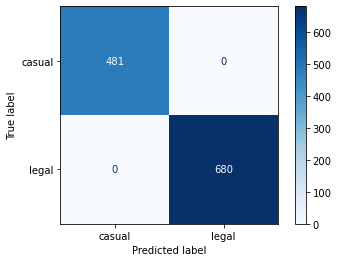

In [37]:
metrics.plot_confusion_matrix(logreg, X_test, y_test, cmap='Blues', 
                      values_format='d', display_labels=['casual', 'legal']);

__Results:__
    
* We see a __true negative__ value, correctly predicted that the post IS NOT a legal advice subreddit, for 481 posts.
* We see a __true positive__ value, correctly predicted that the post IS a legal advice subreddit, for 680 posts. 

In [38]:
#tn, fp, fn, tp

In [39]:
# cm= confusion_matrix(y_test,pred)
# df_cm = pd.DataFrame(
# cm,index = ['tn','fp'], columns=['fn','fp']
# )
# df_cm.head()

In [40]:
#plot_confusion_matrix(logreg, X_test, y_test)

__Logistic regression model using lemmatized words__

In [41]:
# Set up X and y lemmatized words
X = reddit_tvec_lemm_posts
y = reddit['subreddit']

#Train/Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

__Baseline__

In [42]:
y.value_counts(normalize = True)

1    0.583154
0    0.416846
Name: subreddit, dtype: float64

In [43]:
# Instantiate model
logreg_lemm = LogisticRegression(solver = 'newton-cg')
# Fit the model
logreg_lemm.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [44]:
# training accuracy
logreg_lemm.score(X_train, y_train)

1.0

In [45]:
# testing accuracy
logreg_lemm.score(X_test, y_test)

1.0

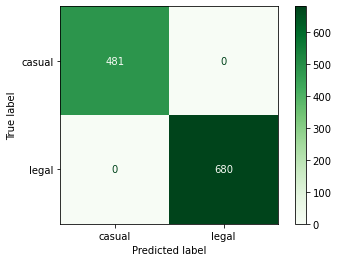

In [47]:
metrics.plot_confusion_matrix(logreg_lemm, X_test, y_test, cmap='Greens', 
                      values_format='d', display_labels=['casual', 'legal']);

In [49]:
#plot_confusion_matrix(logreg_lemm, X_test, y_test)

__Logistic regression model using stemmed words__

In [50]:
# Set up X and y stemmed words
X = reddit_tvec_stem_posts
y = reddit['subreddit']

#Train/Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

__Baseline__

In [51]:
y.value_counts(normalize = True)

1    0.583154
0    0.416846
Name: subreddit, dtype: float64

In [52]:
# Instantiate model
logreg_stem = LogisticRegression(solver = 'newton-cg')
# Fit the model
logreg_stem.fit(X_train, y_train)

LogisticRegression(solver='newton-cg')

In [53]:
# training accuracy
logreg_stem.score(X_train, y_train)

0.7710428037920138

In [54]:
# testing accuracy
logreg_stem.score(X_test, y_test)

0.7631352282515074

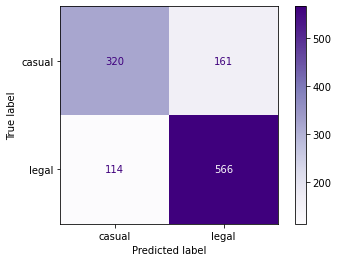

In [57]:
metrics.plot_confusion_matrix(logreg_stem, X_test, y_test, cmap='Purples', 
                      values_format='d', display_labels=['casual', 'legal']);

In [ ]:
__Results:__

We see a true negative value, correctly predicted that the post IS NOT a legal advice subreddit, for 481 posts.
We see a true positive value, correctly predicted that the post IS a legal advice subreddit, for 680 posts.

In [58]:
#plot_confusion_matrix(logreg_stem, X_test, y_test)

### Train/Test split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =123)

### Pipeline 

In [ ]:
pipe = Pipeline ([
    ('tvec', TfidfVectorizer()), 
    ('lr', LogisticRegression())
    #('rf', RandomForestClassifier())
])

## GridSearchCV 

In [ ]:
#tokenizer = C

In [ ]:
#params = {
    'tvec__stop_words': ['english'],
    'tvec__strip_accents': ['ascii'],
    'tvec__max_features': [200],
    #'tvec__norm': ['l2'],
    'tvec__max_df': [0.8],
    'tvec__min_df': [0.2],
    'tvec__binary': ['False']
    
}
#gs = GridSearchCV(pipe, param_grid = params)
#gs.fit(X_train, y_train)
#print(gs.best_score_)
#gs.best_params_

In [ ]:
gs.score(X_test, y_test)

### Model Evaluation 

__confusion matrix__

In [ ]:
pred = gs.predict(X_test)
pred

In [ ]:
(pred != y_test.values).mean()

In [ ]:
X_test[(pred != y_test.values)]

### Random Forest Modeling

__Random Forest using raw posts__

In [59]:
#Set up X and y
X = reddit_tvec_posts
y = reddit['subreddit']

#Train/Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123, stratify=y)

In [60]:
rf = RandomForestClassifier(n_estimators=100)

In [61]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

1.0

In [62]:
#Grid Search to identify the bext parameters to use. 
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

1.0


{'max_depth': None, 'n_estimators': 100}

In [63]:
gs.score(X_train, y_train)

1.0

__Random Forest using lemmatized posts__

In [67]:
#Set up X and y
X_lemm = reddit_tvec_lemm_posts
y_lemm = reddit['subreddit']

#Train/Split 
X_train, X_test, y_train, y_test = train_test_split(X_lemm, y_lemm, random_state = 123, stratify=y)

In [68]:
rf = RandomForestClassifier(n_estimators=100)

In [69]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

1.0

In [70]:
#Grid Search to identify the bext parameters to use. 
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

1.0


{'max_depth': None, 'n_estimators': 100}

In [71]:
gs.score(X_train, y_train)

1.0

__Random Forest using stemmed posts__

In [72]:
#Set up X and y
X_stem = reddit_tvec_stem_posts
y_stem = reddit['subreddit']

#Train/Split 
X_train, X_test, y_train, y_test = train_test_split(X_stem, y_stem, random_state = 123, stratify=y)

In [73]:
rf = RandomForestClassifier(n_estimators=100)

In [74]:
cross_val_score(rf, X_train, y_train, cv=5).mean()

0.7624321806098386

In [ ]:
#Grid Search to identify the bext parameters to use. 
rf_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 1, 2, 3, 4, 5],
}
gs = GridSearchCV(rf, param_grid=rf_params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
gs.score(X_train, y_train)